# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools
we are goint to use Pandas, Matplotlib and Numpy 

In [1]:
# import tools we need
# Regular EDA and ploting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models form sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

### Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

### Data exploration (exploratory data anlysis)
The goal is to find out more about data and become a subject matter expret on the dataset you are working with.

1. What question are you tring to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

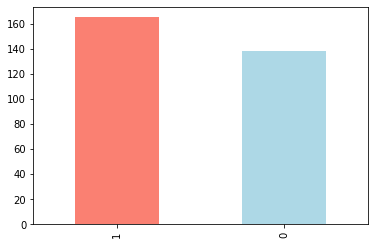

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease Frequency acc to gender


In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target with sex columns
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


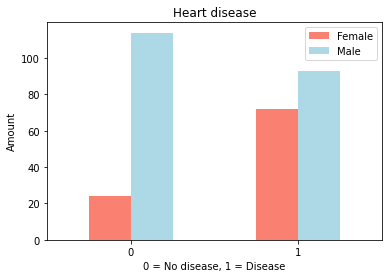

In [12]:
# Create plot for crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Heart disease")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

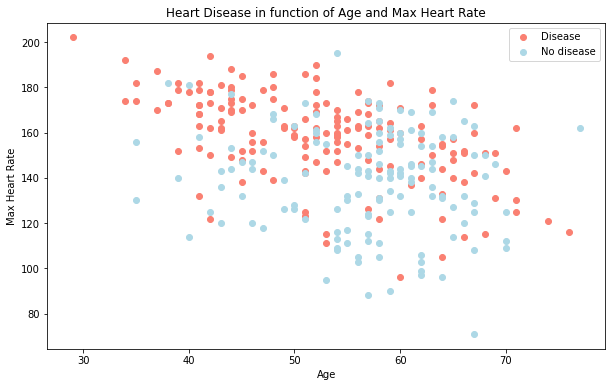

In [13]:
# Age vs Max Heart Rate for Heart disease
plt.figure(figsize=(10, 6))
# Creating scatter
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

# scatter with negative expample
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"])

<AxesSubplot:ylabel='Frequency'>

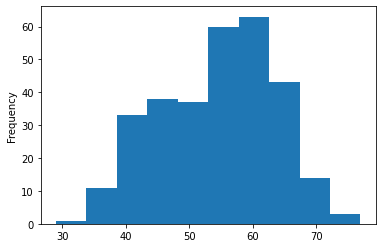

In [14]:
# Check distrubution of age with the help of histogram
df.age.plot.hist()

### Heart disease frequency per Chest pain type 

cp - chest pain type
    
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


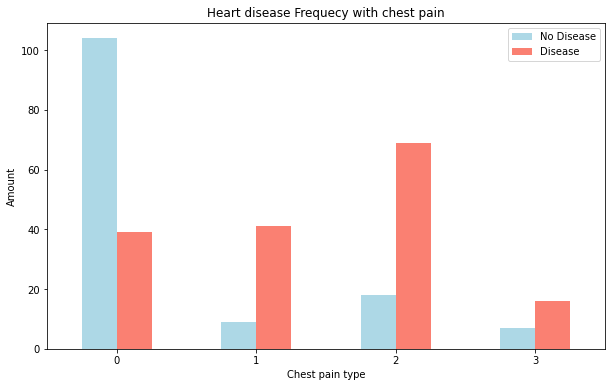

In [16]:
# Make crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["lightblue", "salmon"], figsize=(10, 6))
plt.title("Heart disease Frequecy with chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Make it corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


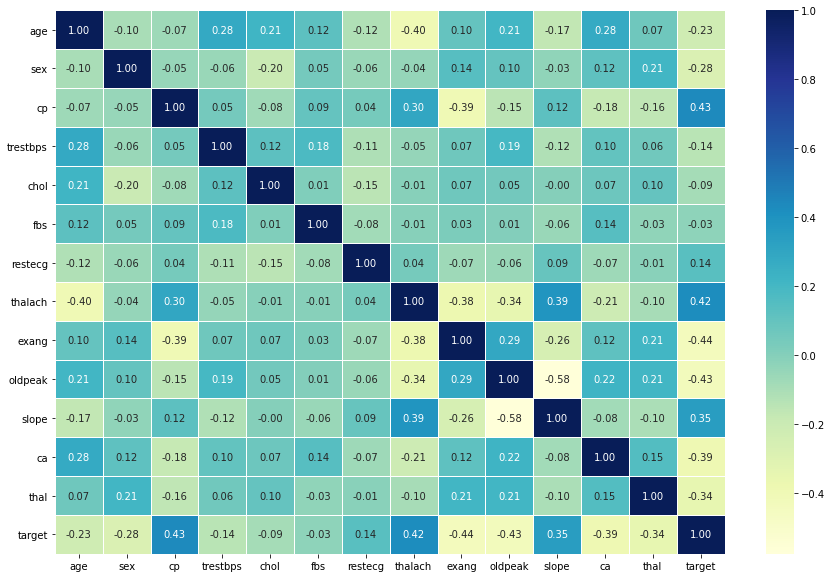

In [19]:
# Let's make our correlation matrix a little pretier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                )

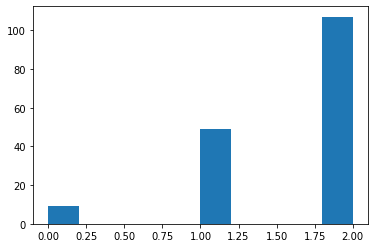

In [20]:
plt.hist(df.slope[df.target == 1]);

## 5. Modeling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# split data into x and y
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# setting random seeed
np.random.seed(42)
# split data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
len(X_train), len(y_train)

(242, 242)

Now we got our data into training and testing now we gona train it. Its time to build machine learning model.

We will train it with training set.

And we will use it on the test set.

We are going to try three different models:-
1. Logistic Regerssion
2. K-nearest Neighbours Classifiar.
3. Random Forest Classifiar,

In [28]:
# Put models in dictionary

models = {"Logistic Regeression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
         }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models : a dict of differnt Scikit learn machine learning models.
    X_train : training data.
    X_test : testing data.
    y_train : training labels.
    y_test: testing labels.
    """
    # set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluting score and storing into dict
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

c:\users\shashang\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regeression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparision

<AxesSubplot:>

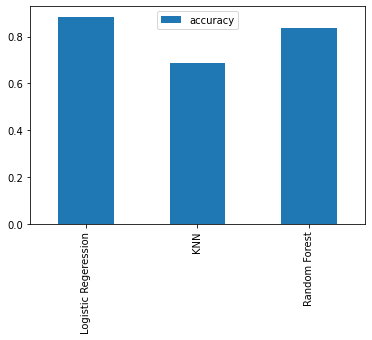

In [30]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Now we have got  base line model and we know that models first prediction aren't always what we should based our next steps off. What should we do.

Let's look at the following
* Hyper parameter tuining
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve

## Hyperparameter tuining

In [31]:
# Lets tune knn
train_scores = []
test_scores = []

# creating list of different values for n_neighbours
neighbours = range(1, 21)

# setup Knn
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    # Fit the algo
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the testing score list
    test_scores.append(knn.score(X_test, y_test))

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Knn Score on the test data: 75.41%


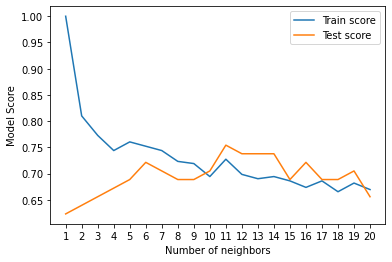

In [33]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1, 21))
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum Knn Score on the test data: {np.max(test_scores)*100:.2f}%")

## Hyperparameter Tuning (with RandomizedSearchCV)
We are going to tune
1. LogisticRegeression.
2. RandomForest.

...using RandomizedSearchCV

In [34]:
# Create a hyperparameter grid for logistic regerssion
logistic_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Create a hyperparameter for RandomForestClassifiar
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Now we have got hyperparameter grids setup for each of our models lets tune them with randomized search cv

In [35]:
# Tune Logistic regeression

np.random.seed(42)

# Setup random hyperparameters search for LogisticRegeression.
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=logistic_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparamter search model for LogisticRegeression
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned logistiv regeression. Let's do the same for Random forest

In [38]:
# Tune Logistic regeression

np.random.seed(42)

# Setup random hyperparameters search for LogisticRegeression.
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparamter search model for LogisticRegeression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [42]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Hyperparameter tuning with GridSearchCV

In [43]:
# Different Hyperparameter for our LogisticRegeression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
}

# setup hyperparamter search for LogisticRegeression

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

# Fitting the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [45]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

## Evaluting

In [46]:
# make prediction with model
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

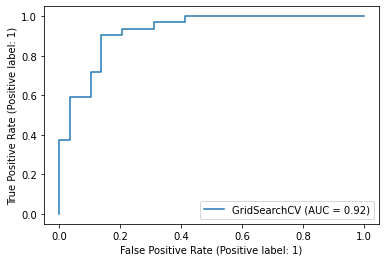

In [49]:
# Plot roc curve and calculate auc metrics
plot_roc_curve(gs_log_reg, X_test, y_test);

In [50]:
# confusion matrics
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


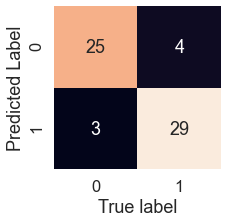

In [54]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

In [55]:
# Classification report and cross validate, precesion, f1 score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [56]:
# Cross validation

clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [64]:
# accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
acc = np.mean(cv_acc)

In [60]:
# precision
cv_precsision = cross_val_score(clf, X, y, cv=5, scoring="precision")
prec = np.mean(cv_precsision)
prec

0.8215873015873015

In [61]:
# recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
recall = np.mean(cv_recall)
recall

0.9272727272727274

In [62]:
# f1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
f1 = np.mean(cv_f1)
f1

0.8705403543192143

<AxesSubplot:title={'center':'Cross-validate classification metrics'}>

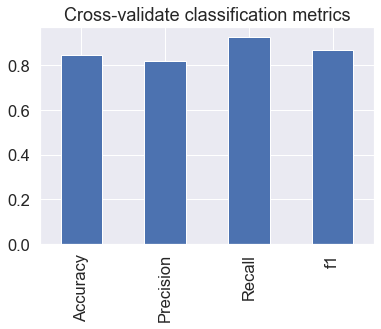

In [66]:
# Visulaize cross validate metrics
cv_metrics = pd.DataFrame({"Accuracy": acc,
                           "Precision": prec,
                           "Recall": recall,
                           "f1": f1
                          },
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validate classification metrics", legend=False)

### Feature importance

Findind feature importance is differnt for each machine learning model

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
# Check coeff
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [77]:
# Match coef of feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

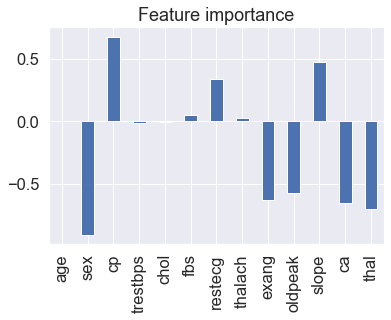

In [84]:
# Visulize feature importance
featrure_df = pd.DataFrame(feature_dict, index=[0])
featrure_df.T.plot.bar(title="Feature importance", legend=False);